In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# specifying some paths
path = r"C:\Users\janse\OneDrive\Bureaublad\Master\Data Mining Techniques\Repo\Assignment2"
testpath = os.path.join(path, 'data', 'test_set_VU_DM.csv')
trainpath = os.path.join(path, 'data', 'training_set_VU_DM.csv')
samplepath = os.path.join(path, 'data', 'train_sample.csv')
resultpath = os.path.join(path, 'data', 'result.csv')

In [4]:
# load train_main
# made a function for quick reusability during development
def reload_train():
    train_main = pd.read_csv(trainpath)
    train_main.date_time = pd.to_datetime(train_main.date_time)
    return train_main

def reload_test():
    test = pd.read_csv(testpath)
    test.date_time = pd.to_datetime(test.date_time)
    return test

In [5]:
train_main = reload_train()
train = train_main
test_main = reload_test()
test = test_main

# Columns

In [8]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      datetime64[ns]
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday

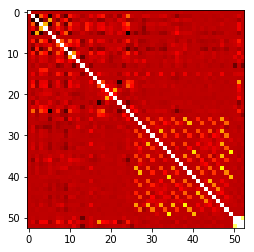

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_main.corr(), cmap='hot', interpolation='nearest')
plt.show()

# General stats

In [5]:
train.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [13]:
# Rates
click_rate = np.mean(train.click_bool)
booking_rate = np.mean(train.booking_bool)
print(click_rate, booking_rate)

0.04474858254172207 0.027910511305481445


In [6]:
# Data period
start = np.min(train.date_time)
end = np.max(train.date_time)

start_test = np.min(test.date_time)
end_test = np.max(test.date_time)
print('Train: {} - {}\nTest: {} - {}'.format(start, end, start_test, end_test))

Train: 2012-11-01 00:08:29 - 2013-06-30 23:58:24
Test: 2012-11-01 00:01:37 - 2013-06-30 23:55:44


In [41]:
search_ids = train.srch_id.nunique()
properties_train = train.prop_id.nunique()
print('Searches: {}\nProperties: {}'.format(search_ids, properties_train))
properties_train = train.prop_id.unique()


search_ids = test.srch_id.nunique()
properties_test = test.prop_id.nunique()
print('\nSearches: {}\nProperties: {}'.format(search_ids, properties_test))
properties_test = test.prop_id.unique()

properties_train = pd.DataFrame({'prop_id' : properties_train})
properties_train['train_ind'] = 1
properties_test  = pd.DataFrame({'prop_id' : properties_test})
properties_test['test_ind'] = 1
props = properties_train.merge(properties_test, on='prop_id', how='outer').fillna(0)
props['occurs_in_both'] = props['train_ind'] == props['test_ind']
print(props['occurs_in_both'].mean())

Searches: 199795
Properties: 129113

Searches: 199549
Properties: 129438
0.8888052832283798


In [43]:
# The amount of times a property is listed only once (new?)

occurances = train[['prop_id', 'srch_id', 'click_bool', 'booking_bool']].groupby('prop_id').agg({'srch_id': 'count','click_bool': 'mean', 'booking_bool': 'mean'})
single_occurances = occurances[occurances.srch_id == 1].srch_id.count()
amount_single_occurances_booked = occurances[(occurances.srch_id == 1) & (occurances.booking_bool > 0)].srch_id.count()
amount_single_occurances_clicked = occurances[(occurances.srch_id == 1) & (occurances.click_bool > 0)].srch_id.count()
print('Single occurances:', single_occurances)
print('Perc booked', amount_single_occurances_booked/single_occurances)
print('Perc clicked', amount_single_occurances_clicked/single_occurances)

Single occurances: 12868
Perc booked 0.03326080198943115
Perc clicked 0.0620920111905502


In [53]:
a = train[['srch_id','prop_id']].groupby('prop_id').count().reset_index()
b = test[['srch_id', 'prop_id']].groupby('prop_id').count().reset_index()
a.columns = ['prop_id', 'train_count']
b.columns = ['prop_id', 'test_count']
a = a.merge(b, on='prop_id', how='outer').fillna(0)
a[(a.test_count > 0) & (a.train_count == 0)].prop_id.count()

7773

# Histograms

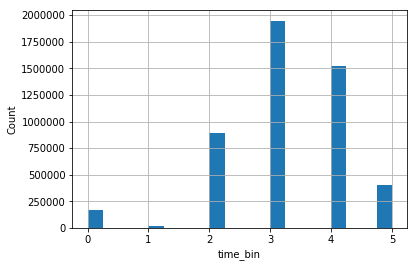

In [54]:
train.prop_starrating.hist(bins = 20)
plt.xlabel('time_bin')
plt.ylabel('Count')
plt.savefig(os.path.join(path, 'images', 'prop_starrating.png'))

C:\Users\janse\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


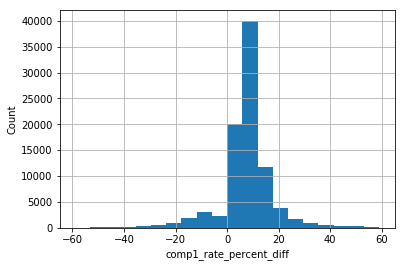

In [33]:
df = train[train.comp1_rate_percent_diff<60]
df['rate'] = df.comp1_rate_percent_diff * df.comp1_rate
df.rate.hist(bins=20)
plt.xlabel('comp1_rate_percent_diff')
plt.ylabel('Count')
plt.savefig(os.path.join(path, 'images', 'comp_rate.png'))

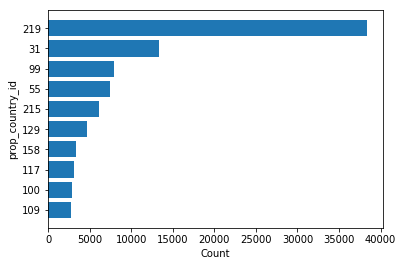

In [31]:
df = train[['prop_id', 'prop_country_id']].drop_duplicates().groupby('prop_country_id').agg('count').reset_index()
df = df.sort_values('prop_id', ascending=False)[:10].sort_values('prop_id', ascending=True)
plt.barh(df.prop_country_id.astype(str), df.prop_id)
plt.xlabel('Count')
plt.ylabel('prop_country_id')
plt.savefig(os.path.join(path, 'images', 'destinations.png'))

In [18]:
df = train[['prop_id', 'prop_country_id']].drop_duplicates().groupby('prop_country_id').agg('count').reset_index()
df['foreign'] = df.prop_country_id != 219
df = df[['foreign', 'prop_id']].groupby('foreign').agg('sum')
print(df)

df = train[['srch_id', 'prop_country_id']].drop_duplicates().groupby('prop_country_id').agg('count').reset_index()
df['foreign'] = df.prop_country_id != 219
df = df[['foreign', 'srch_id']].groupby('foreign').agg('sum')
print(df)

         prop_id
foreign         
False      38381
True       90732
         srch_id
foreign         
False     119267
True       81657


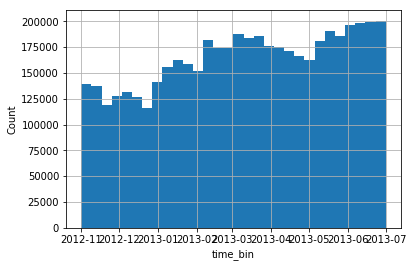

In [6]:
train.date_time.hist(bins = 30)
plt.xlabel('time_bin')
plt.ylabel('Count')
plt.savefig(os.path.join(path, 'images', 'time_distribution.png'))

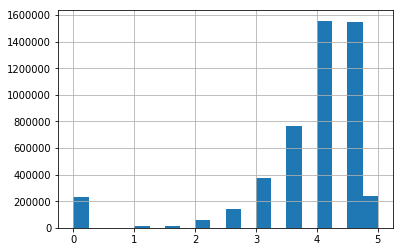

In [42]:
train.prop_review_score.hist(bins = 20)
plt.xlabel('prop_review_score')
plt.ylabel('Count')
plt.savefig(os.path.join(path, 'images', 'review_score_hist.png'))
plt.show()

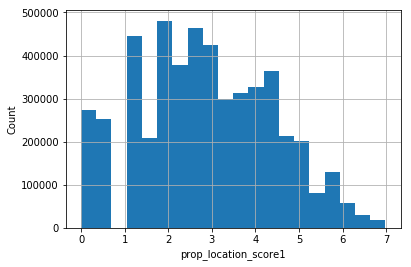

In [52]:
train.prop_location_score1.hist(bins=20)
plt.xlabel('prop_location_score1')
plt.ylabel('Count')
plt.savefig(os.path.join(path, 'images', 'prop_location_score1_hist.png'))
plt.show()

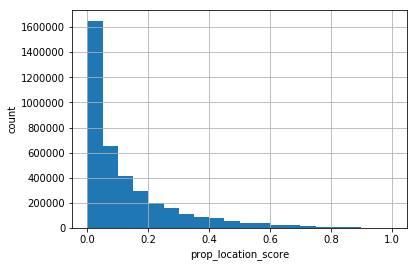

In [51]:
train.prop_location_score2.hist(bins=20)
plt.xlabel('prop_location_score')
plt.ylabel('Count')
plt.show()

19726328.0


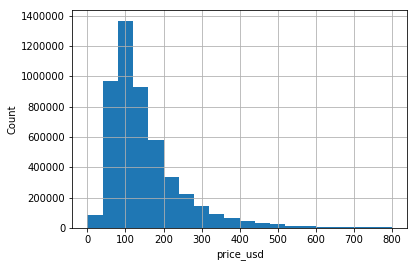

In [55]:
train[train.price_usd < 800].price_usd.hist(bins=20)
print(train.price_usd.max())
plt.xlabel('price_usd')
plt.ylabel('Count')
plt.savefig(os.path.join(path, 'images', 'price_usd_hist.png'))

In [ ]:
train_main[train_main.booking_bool == 1].position.hist()

In [ ]:
train['week'] = train.date_time.dt.strftime('%Y%U').astype(int)
weekly_count = train[['week', 'srch_id']].groupby('week').count().reset_index()
plt.plot(weekly_count.week, weekly_count.srch_id)
plt.show()

In [1]:
max_prop = train[['prop_id','srch_id']].groupby('prop_id').count().reset_index()
max_prop.sort_values('srch_id').head()


NameError: name 'train' is not defined